In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

!pip install joypy
import joypy


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS#wordcloud
sns.set_theme()
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
# Load Dataset
udemy_courses_df = pd.read_csv("data/udemy_courses.csv")

In [5]:
udemy_courses_df.columns


Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

## Number of course offered from each subject
>- we can see from the plot that 

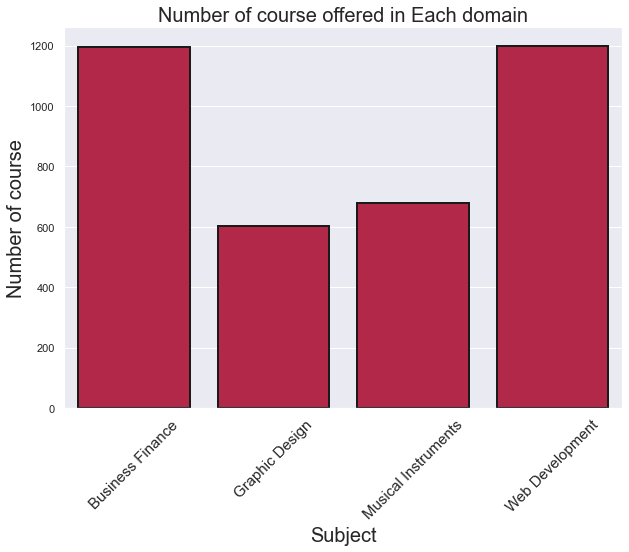

In [6]:
#udemy courses offered
plt.figure(figsize=(10,7))
sns.countplot(udemy_courses_df['subject'],color='#C9113C',lw=2, edgecolor='k')
plt.title("Number of course offered in Each domain",fontsize = 20)
plt.xlabel("Subject", fontsize=20)
plt.ylabel("Number of course", fontsize=20)
plt.xticks(size = 15,rotation=45)
plt.show()


## Free course and Paid courses in Udemy

In [7]:
#Udemy Courses - 
#There are 3368 paid courses and 310 free courses.
print('There are {} paid courses and {} free courses.'.format(udemy_courses_df[udemy_courses_df.is_paid == True].shape[0], udemy_courses_df[udemy_courses_df.is_paid == False].shape[0]))

There are 3368 paid courses and 310 free courses.


In [8]:
udemy_courses_df.groupby(by="subject").count()

course_id  course_title   url  is_paid  price  \
subject                                                              
Business Finance          1195          1195  1195     1195   1195   
Graphic Design             603           603   603      603    603   
Musical Instruments        680           680   680      680    680   
Web Development           1200          1200  1200     1200   1200   

                     num_subscribers  num_reviews  num_lectures  level  \
subject                                                                  
Business Finance                1195         1195          1195   1195   
Graphic Design                   603          603           603    603   
Musical Instruments              680          680           680    680   
Web Development                 1200         1200          1200   1200   

                     content_duration  published_timestamp  
subject                                                     
Business Finance                 1195                 1195  
Graphic Design                    603                  603  
Musical Instruments               680                  680  
Web Development                  1200                 1200

In [9]:
#Course Proportion 
#totalcourses, paid courses, free courses
subject_names = [x for x in udemy_courses_df.subject.unique()]
total_courses = [x for x in udemy_courses_df.subject.value_counts().values]
paid_courses = [x for x in udemy_courses_df[udemy_courses_df.is_paid == True].subject.value_counts().values]
free_courses = [x for x in udemy_courses_df[udemy_courses_df.is_paid == False].subject.value_counts().values]
count_values = np.array([total_courses, paid_courses, free_courses])

<Figure size 1440x1080 with 0 Axes>

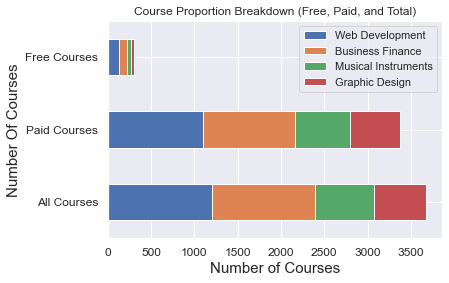

In [10]:

plt.figure(figsize=(20,15))
pay_prop = pd.DataFrame(count_values, columns = udemy_courses_df.subject.value_counts().index.to_list())
pay_prop['course_breakdown'] = ['All Courses', 'Paid Courses', 'Free Courses']
pay_prop.set_index('course_breakdown', inplace=True)
ax = pay_prop.plot(kind='barh', 
                   stacked=True,
                   title='Course Proportion Breakdown (Free, Paid, and Total)',fontsize =12)
ax.set_xlabel('Number of Courses', fontsize=15)
ax.set_ylabel('Number Of Courses', fontsize =15)
plt.show()

In [11]:
#How many courses of each subject Udamy offering
#Paid courses in every subject
#Business Finance--->1195
#Graphic Design--->603
#Musical Instruments--->680
#Web Development--->1200
Paidcourses=udemy_courses_df[udemy_courses_df['price']!='Free'].groupby(['subject'])['course_id'].count()
Paidcourses

subject
Business Finance       1195
Graphic Design          603
Musical Instruments     680
Web Development        1200
Name: course_id, dtype: int64

In [12]:

#33% of the Udemy Courses are from Web Development
#32% of the Udemy Courses are from Business Finance area. 
#Musical Instruments related courses (18%)
#Graphic Design (16%).
Paidcourses=udemy_courses_df[udemy_courses_df['price']!='Free'].groupby(['subject'])['course_id'].count().head(4)
Paidcourses

subject
Business Finance       1195
Graphic Design          603
Musical Instruments     680
Web Development        1200
Name: course_id, dtype: int64

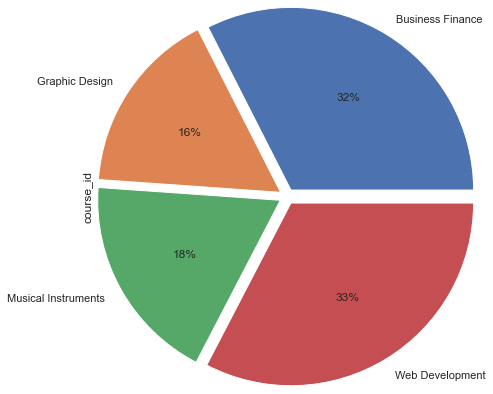

In [13]:
Paidcourses.plot.pie(figsize=(12,7),autopct='%0.f%%',explode=[0.05,0.05,0.05,0.05],radius=1.2);

#Freecourses.plot.pie(figsize=(12,7),autopct='%0.f%%',explode=[0.05,0.05,0.05,0.05],radius=1.2);

In [14]:
#How many free courses are there for every subject?
#free courses in every subject
Freecourses=udemy_courses_df[udemy_courses_df['price']==0].groupby(['subject'])['course_id'].count()
Freecourses

subject
Business Finance        96
Graphic Design          35
Musical Instruments     46
Web Development        133
Name: course_id, dtype: int64

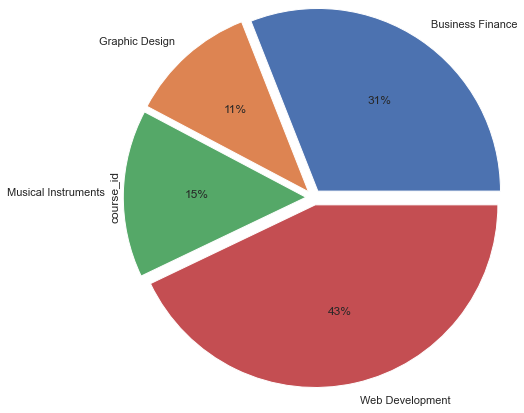

In [15]:
Freecourses.plot.pie(figsize=(12,7),autopct='%0.f%%',explode=[0.05,0.05,0.05,0.05],radius=1.2);

## Comparision between the free course and paid course

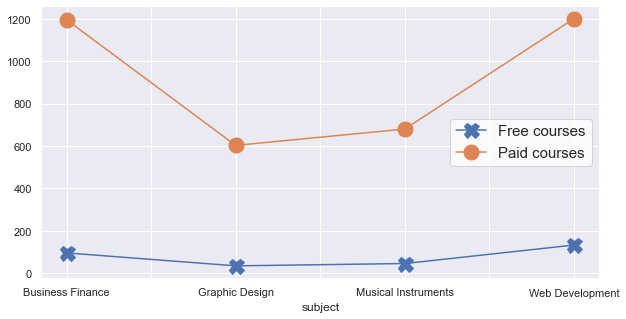

In [16]:
Freecourses.plot.line(figsize=(10,5),markersize=15,marker='X',label='Free courses')
plt.grid()
plt.legend(fontsize=15)
sns.set_style("white");

Paidcourses.plot.line(figsize=(10,5),markersize=15,marker='o',label='Paid courses')
plt.grid()
plt.legend(fontsize=15)
sns.set_style("white");

## What level are doing better in Udemy

In [17]:
# How many levels do we have
udemy_courses_df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

<AxesSubplot:ylabel='level'>

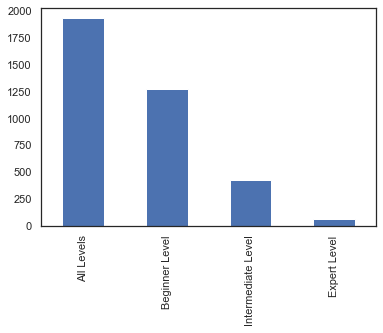

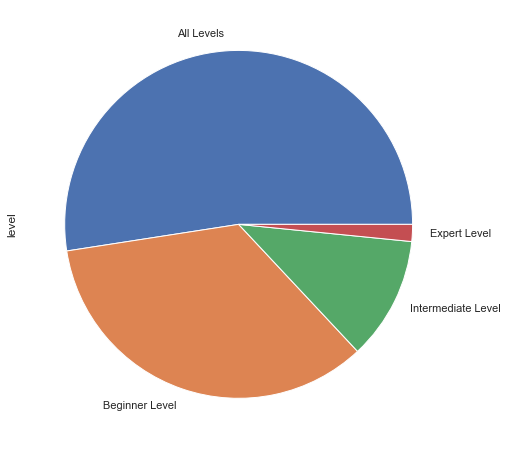

In [18]:
# What is the distribution of courses per levels
udemy_courses_df['level'].value_counts()
#What is the distribution of courses per levels
udemy_courses_df['level'].value_counts().plot(kind='bar')
# What is the distribution of courses per levels
plt.figure(figsize=(15,8))
udemy_courses_df['level'].value_counts().plot(kind='pie')

Text(0.5, 1.0, ' What level of certificate are performing best for customers')

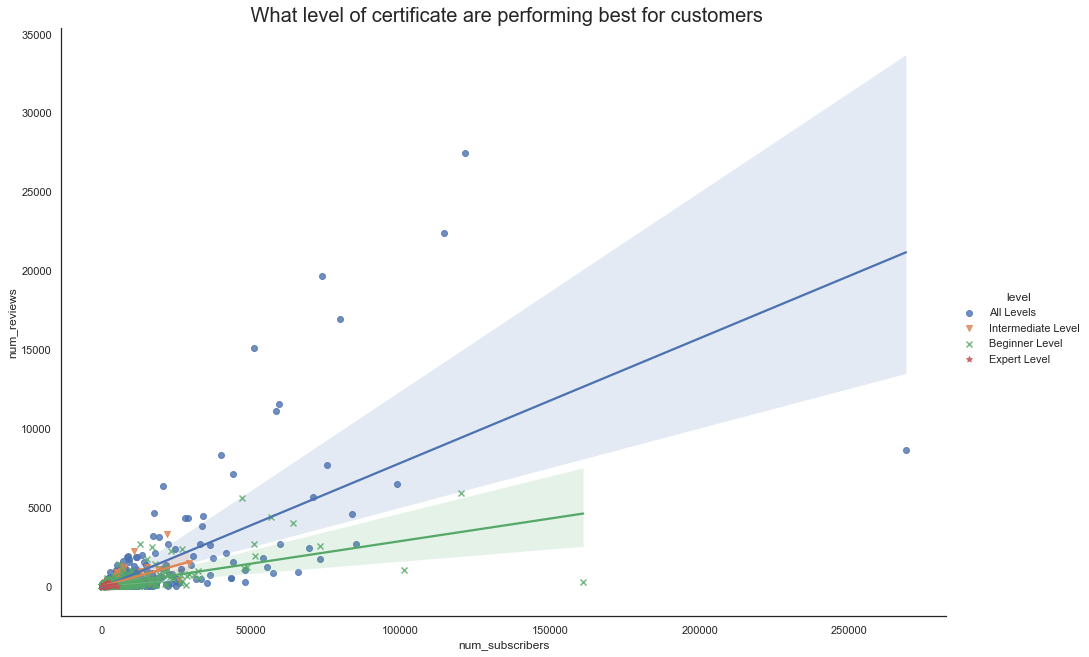

In [19]:
sns.lmplot(x="num_subscribers", y="num_reviews", hue ="level", 
           data=udemy_courses_df.loc[udemy_courses_df["subject"].isin(['Business Finance','Web Development','Graphic Design','Musical Instruments'])], 
           fit_reg=True,markers =['o', 'v','x','*'], height=9, aspect=1.5)
plt.title(" What level of certificate are performing best for customers", fontsize =20)

# What Donain are performing best for coustomer

In [20]:
 #Total Number of Subscribers in udemy courses
udemy_courses_df['num_subscribers'].sum()

11759120

In [21]:
# Number of subscribers per Subject in udemy
udemy_courses_df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7980572
Name: num_subscribers, dtype: int64

In [22]:
#What is the maximum number of Subscribers for each domain of courses?
maximum_subscribers=udemy_courses_df.groupby(['subject'])['num_subscribers'].max()
maximum_subscribers

subject
Business Finance        65576
Graphic Design          53851
Musical Instruments    101154
Web Development        268923
Name: num_subscribers, dtype: int64

<AxesSubplot:ylabel='num_subscribers'>

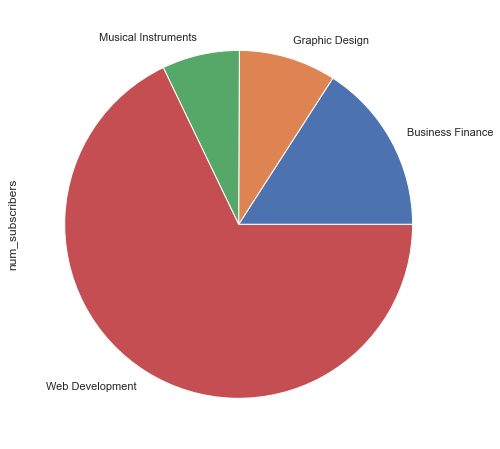

In [23]:
plt.figure(figsize=(15,8))

# visualization of the Number of subscribers per Subject in udemy
udemy_courses_df.groupby('subject')['num_subscribers'].sum().plot(kind='pie')

Text(0.5, 1.0, 'course domains (IT, marketing, business etc.) are performing best for customers')

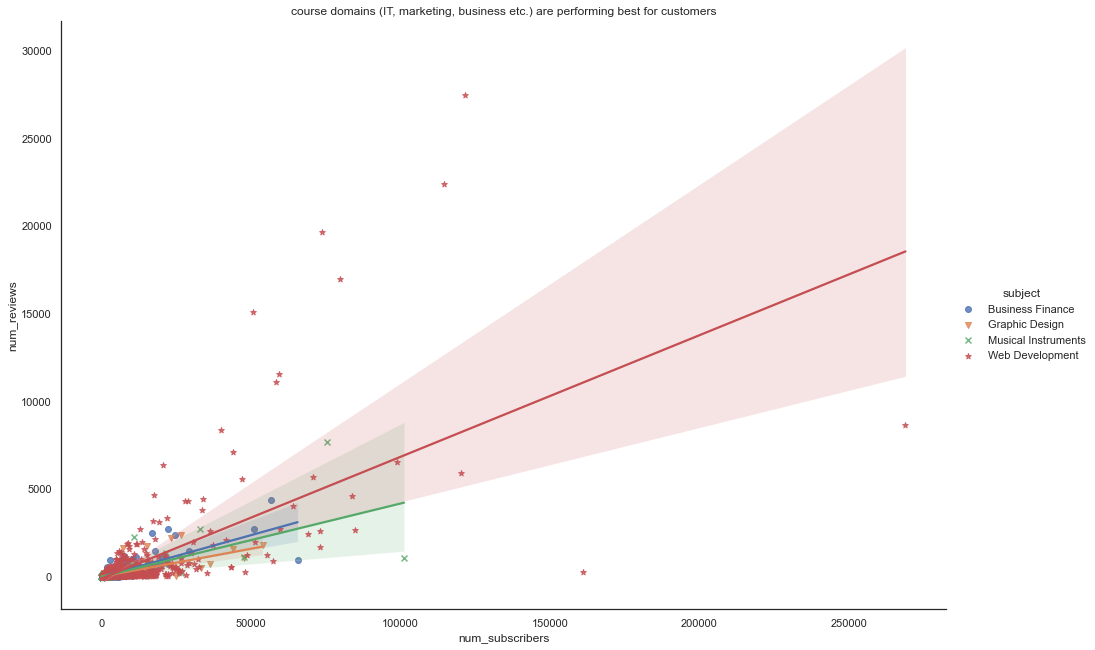

In [24]:
sns.lmplot(x="num_subscribers", y="num_reviews", hue ="subject", 
           data=udemy_courses_df.loc[udemy_courses_df["subject"].isin(['Business Finance','Web Development','Graphic Design','Musical Instruments'])], 
           fit_reg=True,markers =['o', 'v','x','*'], height=9, aspect=1.5)
plt.title("course domains (IT, marketing, business etc.) are performing best for customers", fontsize =12)

In [25]:
# How many subscribers per levels
udemy_courses_df.groupby('level')['num_subscribers'].sum()
udemy_courses_df[['num_subscribers','level']]

num_subscribers               level
0                2147          All Levels
1                2792          All Levels
2                2174  Intermediate Level
3                2451          All Levels
4                1276  Intermediate Level
...               ...                 ...
3673             1040          All Levels
3674              306      Beginner Level
3675              513          All Levels
3676              300          All Levels
3677              901      Beginner Level

[3678 rows x 2 columns]

In [26]:
#level of courses present 
#1929 courses which belong to 'All Levels', 1270 courses from the 'Beginner Level',
#421 courses from the 'Intermediate Level' and 58 courses from the 'Expert Level'.
udemy_courses_df['level'].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [27]:
# How many levels per subject category
udemy_courses_df.groupby('subject')['level'].value_counts()

subject              level             
Business Finance     All Levels            696
                     Beginner Level        340
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: level, dtype: int64

<AxesSubplot:xlabel='subject,level'>

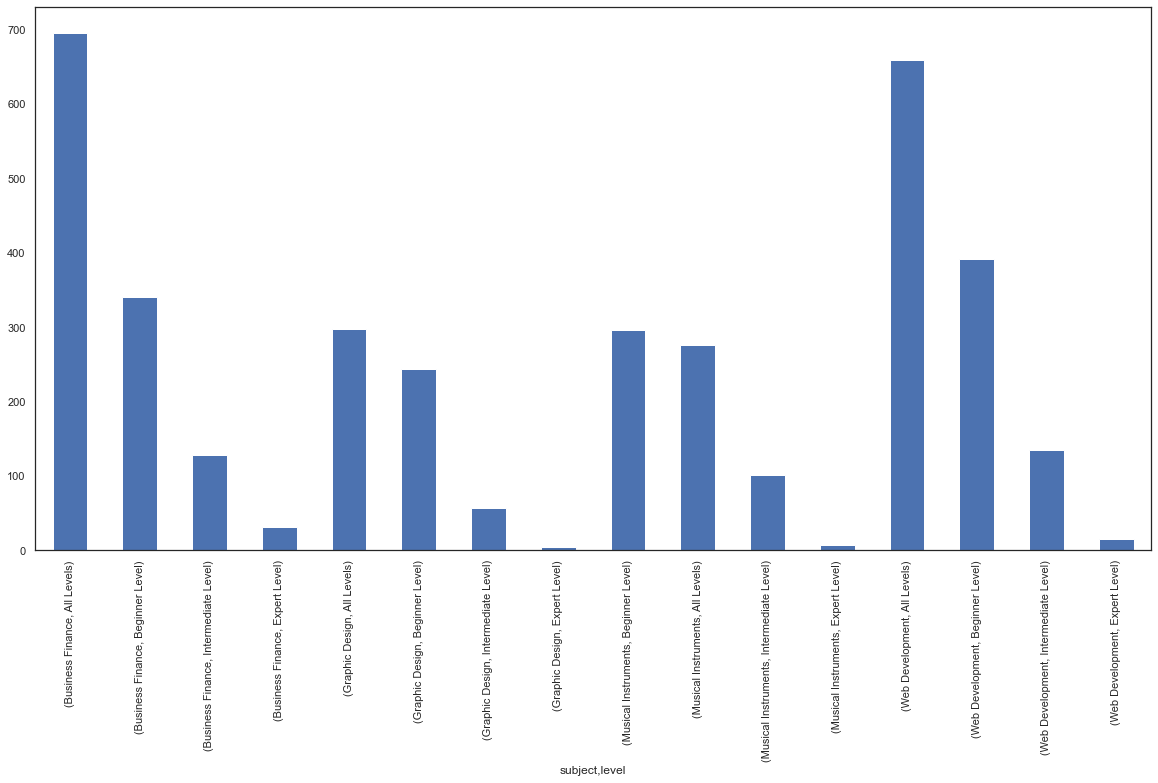

In [28]:
# Plot of How many levels per subject category

plt.figure(figsize=(20,10))
udemy_courses_df.groupby('subject')['level'].value_counts().plot(kind='bar')

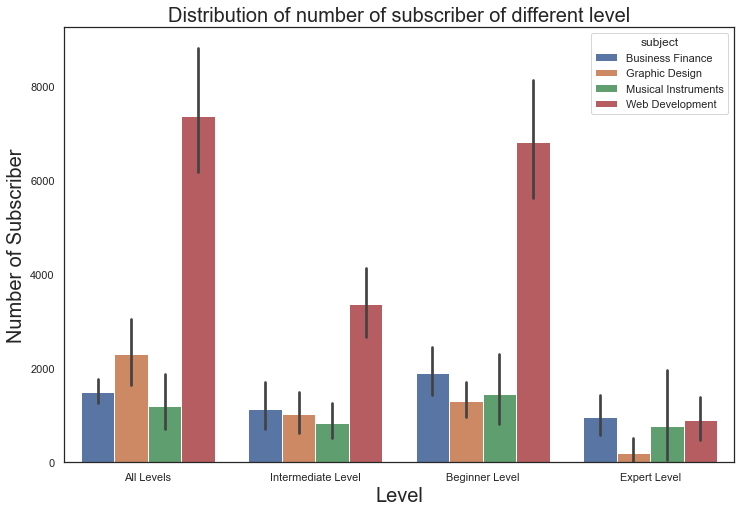

In [29]:
# visualization
plt.figure(figsize=(12,8))
sns.barplot(x='level',y='num_subscribers', hue='subject',data=udemy_courses_df)
plt.title("Distribution of number of subscriber of different level", fontsize =20)
plt.xlabel("Level", fontsize =20)
plt.ylabel("Number of Subscriber", fontsize =20)
plt.show()

In [30]:
#Udemy Most Subscribed Courses
sorted_by_subsceiption_df=udemy_courses_df.sort_values(by='num_subscribers')
fig = px.histogram(sorted_by_subsceiption_df.tail(30), 
                   y="course_title", 
                   x='num_subscribers',
                   color='is_paid',
                   title=' Udemy Most Subscribed Courses')
fig.show()

In [31]:
#Udemy Most Subscribed Courses
sorted_by_subsceiption_df=udemy_courses_df.sort_values(by='num_subscribers')
fig = px.histogram(sorted_by_subsceiption_df.tail(30), 
                   y="course_title", 
                   x='num_subscribers',
                   color='is_paid',
                   title=' Udemy Most Subscribed Courses')
fig.show()

In [32]:
#Top courses
#udemy_courses_df
udemy_courses_df["date"]=udemy_courses_df.published_timestamp.astype("datetime64")
udemy_courses_df["year"]=udemy_courses_df.date.dt.year

In [33]:
# Udemy top paid courses
udemy_courses_df["year"]=udemy_courses_df.date.dt.year
udemy_top_paid_courses = udemy_courses_df[udemy_courses_df['price']!=0][['course_title','year','subject','num_subscribers']].sort_values(by= 'num_subscribers',ascending=False).head(15)
udemy_top_paid_courses

course_title  year  \
3230                         The Web Developer Bootcamp  2015   
3232              The Complete Web Developer Course 2.0  2016   
2619             Learn Javascript & JQuery From Scratch  2013   
3247          JavaScript: Understanding the Weird Parts  2015   
1979  Pianoforall - Incredible New Way To Learn Pian...  2014   
3204  Angular 4 (formerly Angular 2) - The Complete ...  2016   
2701                Become a Web Developer from Scratch  2011   
3246                     Learn and Understand AngularJS  2014   
3251                        Learn and Understand NodeJS  2015   
2662  The Complete HTML & CSS Course - From Novice T...  2015   
3175  Complete PHP Course With Bootstrap3 CMS System...  2015   
3205        Build Websites from Scratch with HTML & CSS  2013   
3254                            Modern React with Redux  2015   
2479  Learning Dynamic Website Design - PHP MySQL an...  2012   
3249  Build Responsive Real World Websites with HTML...  2015   

                  subject  num_subscribers  
3230      Web Development           121584  
3232      Web Development           114512  
2619      Web Development            84897  
3247      Web Development            79612  
1979  Musical Instruments            75499  
3204      Web Development            73783  
2701      Web Development            69186  
3246      Web Development            59361  
3251      Web Development            58208  
2662      Web Development            57422  
3175      Web Development            55332  
3205      Web Development            51257  
3254      Web Development            50815  
2479      Web Development            47886  
3249      Web Development            43977

In [34]:

px.bar(data_frame= udemy_top_paid_courses,y="num_subscribers",x="course_title")


In [35]:
#Top 15 free/non paid courses

non_paid_courses =udemy_courses_df[["course_title", "year", "subject", "num_subscribers"]][udemy_courses_df["is_paid"]==False].sort_values(by="num_subscribers", ascending=False)[:15]

In [36]:
non_paid_courses

course_title  year  \
2827               Learn HTML5 Programming From Scratch  2013   
3032                     Coding for Entrepreneurs Basic  2013   
2783  Build Your First Website in 1 Week with HTML5 ...  2014   
1896              Free Beginner Electric Guitar Lessons  2012   
2589  Web Design for Web Developers: Build Beautiful...  2015   
3289  Practical PHP: Master the Basics and Code Dyna...  2014   
3665               Beginner Photoshop to HTML5 and CSS3  2012   
2782  Web Development By Doing: HTML / CSS From Scratch  2013   
3325  HTML and CSS for Beginners - Build a Website &...  2015   
492   Bitcoin or How I Learned to Stop Worrying and ...  2013   
2592                               Quickstart AngularJS  2014   
3219      Learn Responsive Web Development from Scratch  2013   
143     Accounting in 60 Minutes - A Brief Introduction  2013   
1461  Photoshop In-Depth: Master all of Photoshop's ...  2014   
103                Stock Market Investing for Beginners  2013   

                  subject  num_subscribers  
2827      Web Development           268923  
3032      Web Development           161029  
2783      Web Development           120291  
1896  Musical Instruments           101154  
2589      Web Development            98867  
3289      Web Development            83737  
3665      Web Development            73110  
2782      Web Development            72932  
3325      Web Development            70773  
492      Business Finance            65576  
2592      Web Development            64128  
3219      Web Development            59639  
143      Business Finance            56659  
1461       Graphic Design            53851  
103      Business Finance            50855

In [37]:
px.histogram(data_frame=non_paid_courses,x="subject",y="num_subscribers")

In [38]:
#Top 15 non paid courses
fig = px.bar(non_paid_courses, y= 'num_subscribers', x='course_title', hover_data = non_paid_courses[['year','subject']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(xaxis = go.layout.XAxis(tickangle = 45))
fig.show()

In [39]:
#Top Expensive Courses in udemy
top_price = udemy_courses_df[['course_title','year','subject','num_subscribers', 'price']].sort_values(by=['price','num_subscribers'], ascending=False).head(15)
top_price


course_title  year  \
3230                         The Web Developer Bootcamp  2015   
3232              The Complete Web Developer Course 2.0  2016   
1979  Pianoforall - Incredible New Way To Learn Pian...  2014   
1213  Photoshop for Entrepreneurs - Design 11 Practi...  2016   
3233  Ultimate Web Designer & Developer Course: Buil...  2015   
3206  PHP for Beginners -Become a PHP Master - Proje...  2015   
2621            The Ultimate Web Developer How To Guide  2015   
1526                 How To Make Graphics For A Website  2014   
3117                                  1 Hour JavaScript  2013   
2755  Become A Web Developer And Seller - Build Webs...  2013   
1980                The Professional Guitar Masterclass  2015   
44         Black Algo Trading: Build Your Trading Robot  2014   
1220  Canva Graphics Design for Entrepreneurs - Desi...  2016   
2707  Back to School Web Development and Programming...  2013   
2943  Adobe Flash for Beginners - Build Flash Websit...  2014   

                  subject  num_subscribers  price  
3230      Web Development           121584    200  
3232      Web Development           114512    200  
1979  Musical Instruments            75499    200  
1213       Graphic Design            36288    200  
3233      Web Development            33788    200  
3206      Web Development            28880    200  
2621      Web Development            24861    200  
1526       Graphic Design            24857    200  
3117      Web Development            22999    200  
2755      Web Development            21730    200  
1980  Musical Instruments            21701    200  
44       Business Finance            20195    200  
1220       Graphic Design            18303    200  
2707      Web Development            18170    200  
2943      Web Development            17071    200

In [40]:
#Udemy course price range

udemy_courses_df['price'].dtype

# unique price
udemy_courses_df.price.unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

In [41]:
# Udemy  max price
udemy_courses_df['price'].max()

200

In [42]:
#Extensive EDA of Udemy's Courses
#EDA - How does price effect the buyer?
# looking closer into price.
# Build a boxplot on price
#Does price differ frome different subjects?
# Relationship between price and num_subscribers
#Relatoinship between price and num_reviews
# Covert 'Free' to 0
# Covert or delete 'TRUE'
# Covert column to integer



In [43]:
# df.price.value_counts()

#Step 1: Converting Free
udemy_courses_df.price = udemy_courses_df.price.replace('Free', 0)

#Step 2: Delete the 1 row where price is = TRUE
that_one_element = udemy_courses_df[udemy_courses_df.price == 'TRUE'].index
udemy_courses_df.drop(that_one_element, inplace = True, axis = 0)

#Step 3: Convert column to integer
udemy_courses_df.price = pd.to_numeric(udemy_courses_df['price'])

<Figure size 432x288 with 0 Axes>

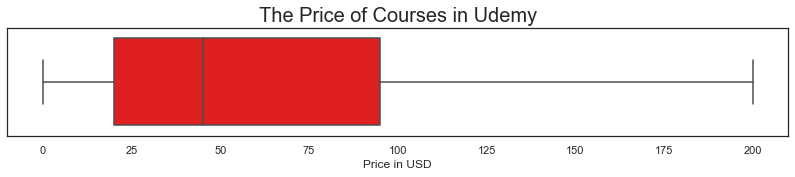

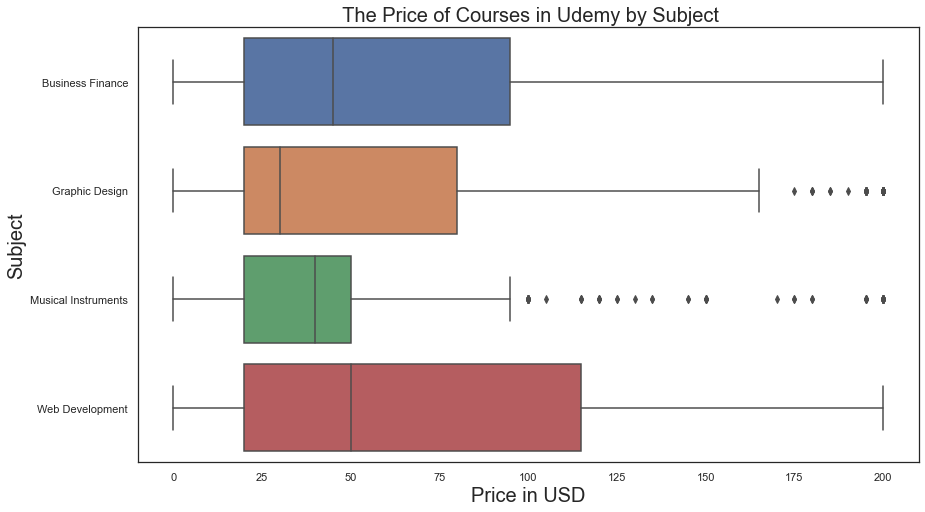

In [44]:

#The price of courses in udemy
plt.figure()
plt.subplots(figsize = (14,2))
sns.boxplot(x = udemy_courses_df.price, data = udemy_courses_df, color = 'red')
plt.title('The Price of Courses in Udemy',fontsize = 20)
plt.xlabel('Price in USD') #We assuming all prices are in USD

plt.subplots(figsize = (14,8))
sns.boxplot(x = udemy_courses_df.price, y = udemy_courses_df.subject, data = udemy_courses_df)
plt.title(' The Price of Courses in Udemy by Subject',fontsize = 20)
plt.xlabel('Price in USD', fontsize=20) #we assuming all prices are in USD
plt.ylabel("Subject", fontsize=20)
plt.show()

In [45]:
#Average price of a course is just under $50 USD
#Graphic Design courses has the lowest average prices
#Web Development courses has the largest interquartile range in price.
#Music courses have the lowest interquatile range in price.
#what about the relationships price have with the other features?


                  course_id   is_paid     price  num_subscribers  num_reviews  \
course_id          1.000000 -0.013679  0.142319        -0.167856    -0.058550   
is_paid           -0.013679  1.000000  0.328513        -0.266159    -0.087471   
price              0.142319  0.328513  1.000000         0.050769     0.113696   
num_subscribers   -0.167856 -0.266159  0.050769         1.000000     0.649946   
num_reviews       -0.058550 -0.087471  0.113696         0.649946     1.000000   
num_lectures      -0.024646  0.112574  0.330160         0.157746     0.243029   
content_duration  -0.057223  0.094417  0.293450         0.161839     0.228889   
year               0.933151 -0.017609  0.132990        -0.184574    -0.053318   

                  num_lectures  content_duration      year  
course_id            -0.024646         -0.057223  0.933151  
is_paid               0.112574          0.094417 -0.017609  
price                 0.330160          0.293450  0.132990  
num_subscribers       0.15

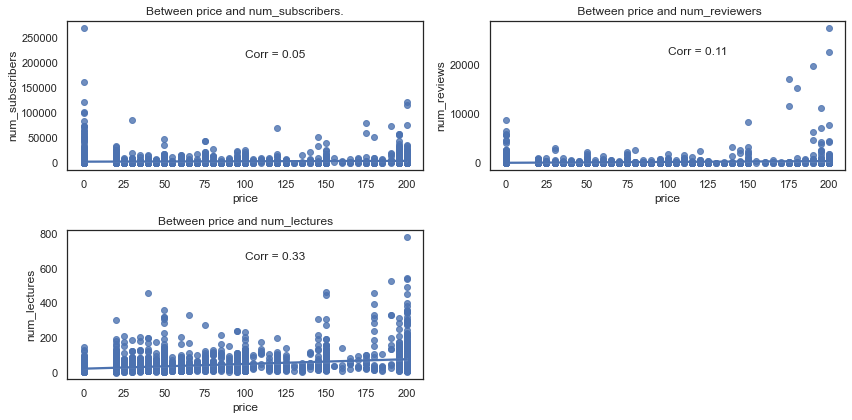

In [46]:
print(udemy_courses_df.corr())


plt.figure(figsize = (12,6))

plt.subplot(221)
sns.regplot(x=udemy_courses_df.price, y=udemy_courses_df.num_subscribers, data = udemy_courses_df)
plt.title('Between price and num_subscribers.')
plt.text(100, 210000,'Corr = 0.05')

plt.subplot(222)
sns.regplot(udemy_courses_df.price, y=udemy_courses_df.num_reviews,data = udemy_courses_df)
plt.title(' Between price and num_reviewers')
plt.text(100, 22000,'Corr = 0.11')

plt.subplot(223)
sns.regplot(x=udemy_courses_df.price, y=udemy_courses_df.num_lectures,data = udemy_courses_df)
plt.title('Between price and num_lectures')
plt.text(100, 650,'Corr = 0.33')

plt.tight_layout()
plt.show()

In [47]:
price_stats = udemy_courses_df.price.describe()

print('Course prices range from ${:.2f} to ${:.2f}.'.format(round(price_stats['min'], 2), round(price_stats['max'], 2)))
print('The mean course price is ${:.2f}, and the standard deviation is ${:.2f}.'.format(round(price_stats['mean'], 2), round(price_stats['std'], 2)))
print('The median coure price is ${:.2f}.'.format(round(price_stats['50%'], 2)))
print('The middle 50% of course prices are between ${:.2f} and ${:.2f}.'.format(round(price_stats['25%'], 2), round(price_stats['75%'], 2)))

Course prices range from $0.00 to $200.00.
The mean course price is $66.05, and the standard deviation is $61.01.
The median coure price is $45.00.
The middle 50% of course prices are between $20.00 and $95.00.


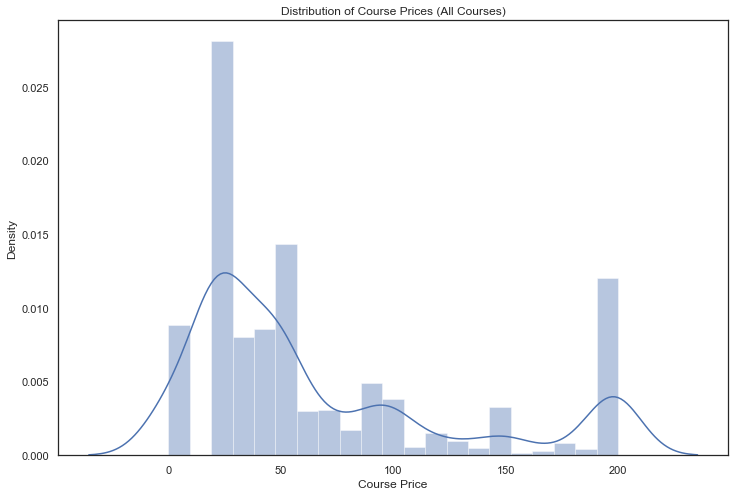

In [48]:
#Distribution of prices of all courses
plt.figure(figsize = (12,8))
ax = sns.distplot(udemy_courses_df.price)
ax.set(title='Distribution of Course Prices (All Courses)', xlabel='Course Price')
plt.show()

In [49]:
#ax = sns.boxplot(x=udemy_courses_df.subject, y=udemy_courses_df.price)
#ax.set(title='Course Price Distribution by Subject', xlabel='Subject', ylabel='Course Price')
#plt.show()

In [50]:
price_summary = udemy_courses_df.groupby('subject').describe().price.reset_index(drop=False)
price_dict = udemy_courses_df.price.describe().to_dict()
price_dict['subject'] = 'ALL COURSES'
price_summary.append(price_dict, ignore_index=True)

price_summary

subject   count       mean        std  min   25%   50%    75%  \
0     Business Finance  1195.0  68.552301  64.379824  0.0  20.0  45.0   95.0   
1       Graphic Design   603.0  57.827529  57.211708  0.0  20.0  30.0   80.0   
2  Musical Instruments   680.0  49.558824  41.187592  0.0  20.0  40.0   50.0   
3      Web Development  1200.0  77.033333  66.080477  0.0  20.0  50.0  115.0   

     max  
0  200.0  
1  200.0  
2  200.0  
3  200.0

In [51]:
#Course prices for Web Development and Business Finance are higher on
#average than prices for courses related to Musical Instruments or Graphic Design.
#Web Development and Business Finance also show the most variation in price.
#Price distributions for each of the four subjects using a ridgeline plot.


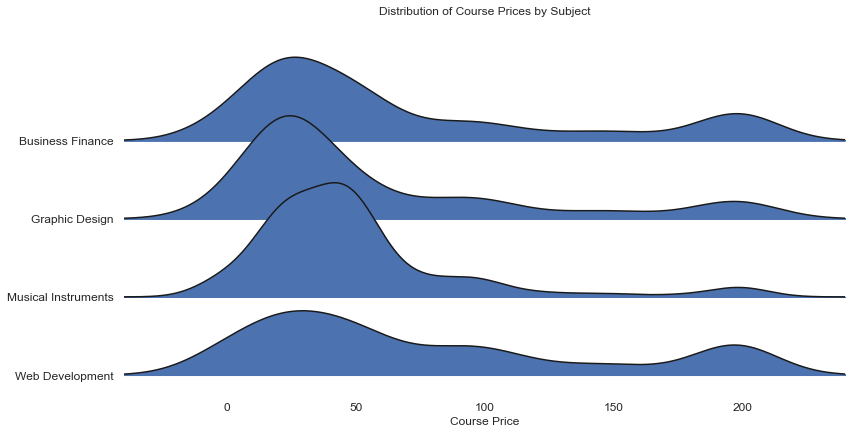

In [52]:
 #We can see that the price distribution each subject includes two peaks:
#one near the median price for the subject and one at $200 USD.This is the maximum course price that Udemy allows
#There are clusters of courses with this price in each subject group.

fig, ax = joypy.joyplot(udemy_courses_df, by='subject', column='price', figsize=(12, 6), title='Distribution of Course Prices by Subject')
plt.xlabel('Course Price')
plt.show()

In [53]:
fig = px.histogram(udemy_courses_df, x= 'is_paid', title='Prices of UDEMY Courses')

fig.show()

In [54]:
fig = px.histogram(udemy_courses_df, x= 'price', title='Prices of UDEMY Courses')

fig.show()

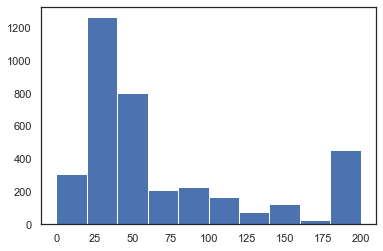

In [55]:


plt.hist(udemy_courses_df.price)
plt.show()



In [56]:
fig = px.pie(udemy_courses_df, names='price')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.update_layout(title_text='Prices of UDEMY Courses')
fig.show()

In [57]:


#As seen in the histogram, piechart UDEMY has 310 free course and it's 295 courses are priced as $200 .

In [58]:
#Which level courses were most present?
#Web development is the subject which has the most number of subscribers and to add on it has the most number of courses. 
#unique_subject=list(dataset.subject.unique())
pd.pivot_table(udemy_courses_df,values='num_subscribers',index='subject',aggfunc=np.sum)

num_subscribers
subject                             
Business Finance             1868711
Graphic Design               1063148
Musical Instruments           846689
Web Development              7980572

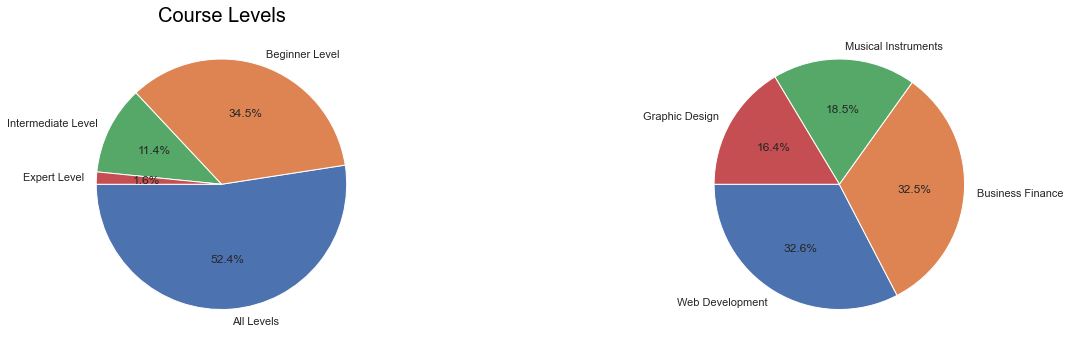

In [59]:
# count number of instances
level_values = udemy_courses_df["level"].value_counts()

# count number of instances
subject_values =udemy_courses_df["subject"].value_counts()

# pie plot of course levels and subjects in data
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].pie(level_values, startangle=180, labels=level_values.index,autopct="%1.1f%%")
ax[0].set_title("Course Levels", size=20,color= "black")
ax[1].pie(subject_values, startangle=180, labels=subject_values.index, autopct="%1.1f%%")
#ax[1].set_title("Course Subjects", size=20,color= "black")
plt.tight_layout()
plt.show()

In [60]:
# Number of subscribers per Subject
udemy_courses_df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7980572
Name: num_subscribers, dtype: int64

<AxesSubplot:xlabel='subject'>

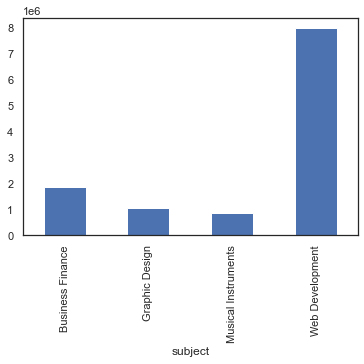

In [61]:
# Plot of the Number of subscribers per Subject
udemy_courses_df.groupby('subject')['num_subscribers'].sum().plot(kind='bar')

In [62]:
#Price of Udemy Courses
#According to the histogram above, UDEMY has 310 free course and it's 295 courses are priced as $200 . 
#As we expected, there is highly right skewed distribution.
fig = px.histogram(data_frame=udemy_courses_df, x="price",marginal="box",title="Price of Udemy Courses")
fig.show()

In [63]:
#Number of Subscribers of UDEMY Courses
fig = px.histogram(data_frame=udemy_courses_df, x="num_subscribers", marginal="box", title="Number of Subscribers of UDEMY Courses")
fig.show()

In [64]:
#Udemy Courses By Subject in Each Year
udemy_courses_df['date'] = pd.to_datetime(udemy_courses_df['published_timestamp'])

In [65]:
udemy_courses_df['year']= udemy_courses_df['date'].dt.year
subject = udemy_courses_df.groupby('year')['subject'].value_counts().reset_index(level=0).rename(columns={'subject': 'subject count'}, index={'index': 'Subject'})
subject

year  subject count
subject                                 
Web Development      2011              5
Web Development      2012             19
Graphic Design       2012             10
Musical Instruments  2012             10
Business Finance     2012              6
Business Finance     2013             84
Web Development      2013             56
Musical Instruments  2013             39
Graphic Design       2013             23
Business Finance     2014            192
Musical Instruments  2014            120
Web Development      2014            113
Graphic Design       2014             66
Business Finance     2015            339
Web Development      2015            336
Musical Instruments  2015            171
Graphic Design       2015            168
Web Development      2016            448
Business Finance     2016            349
Musical Instruments  2016            228
Graphic Design       2016            181
Business Finance     2017            225
Web Development      2017            223
Graphic Design       2017            155
Musical Instruments  2017            112

In [66]:
fig = px.bar(subject, x='year', y='subject count')
fig.show()

In [67]:
#Courses by level each year
level = udemy_courses_df.groupby('year')['level'].value_counts().reset_index(level=0).rename(columns={'level': 'level count'}, index={'index': 'Level_of_Courses'})
level

year  level count
level                                
All Levels          2011            5
All Levels          2012           33
Beginner Level      2012            9
Intermediate Level  2012            3
All Levels          2013          102
Beginner Level      2013           73
Intermediate Level  2013           18
Expert Level        2013            9
All Levels          2014          272
Beginner Level      2014          155
Intermediate Level  2014           60
Expert Level        2014            4
All Levels          2015          587
Beginner Level      2015          332
Intermediate Level  2015           80
Expert Level        2015           15
All Levels          2016          627
Beginner Level      2016          405
Intermediate Level  2016          163
Expert Level        2016           11
All Levels          2017          303
Beginner Level      2017          296
Intermediate Level  2017           97
Expert Level        2017           19

In [68]:

#Here we can see that Udemy courses in all levels, beginner levels and intermediate levels increased significantly by each year
# Expert level courses offered by Udemy  are inconsistent.
fig = px.line(level, x='year', y='level count', color= level.index, title='Udemy Courses By Level in each year')
fig.show()

In [69]:

#Number of Subscribers & Num of Reviews and Number of Lectures by Year of udemy courses
mydf= udemy_courses_df.groupby('year')[['num_subscribers','num_reviews','num_lectures']].sum().reset_index()
mydf

year  num_subscribers  num_reviews  num_lectures
0  2011           119028         4041           574
1  2012           555339        10272          2374
2  2013          1723438        48585          7261
3  2014          1930406        86667         19288
4  2015          3475324       196810         41930
5  2016          2966644       195429         50854
6  2017           988941        32917         25239

In [70]:
#Number of subscribers increased constantly till 2015 and
#then decreased around a half milliion on 2016
fig = px.line(mydf, x='year', y=['num_subscribers','num_reviews','num_lectures'])
fig.show()

In [71]:
#udemy Top 15 Reviewed Courses

udemytopreviewed = udemy_courses_df[['course_title','year','subject','is_paid','num_reviews']].sort_values(by='num_reviews', ascending=False).head(15)

udemytopreviewed

course_title  year  \
3230                         The Web Developer Bootcamp  2015   
3232              The Complete Web Developer Course 2.0  2016   
3204  Angular 4 (formerly Angular 2) - The Complete ...  2016   
3247          JavaScript: Understanding the Weird Parts  2015   
3254                            Modern React with Redux  2015   
3246                     Learn and Understand AngularJS  2014   
3251                        Learn and Understand NodeJS  2015   
2827               Learn HTML5 Programming From Scratch  2013   
3228  Angular 2 with TypeScript for Beginners: The P...  2016   
1979  Pianoforall - Incredible New Way To Learn Pian...  2014   
3249  Build Responsive Real World Websites with HTML...  2015   
2589  Web Design for Web Developers: Build Beautiful...  2015   
3256                  The Complete ASP.NET MVC 5 Course  2016   
2783  Build Your First Website in 1 Week with HTML5 ...  2014   
3325  HTML and CSS for Beginners - Build a Website &...  2015   

                  subject  is_paid  num_reviews  
3230      Web Development     True        27445  
3232      Web Development     True        22412  
3204      Web Development     True        19649  
3247      Web Development     True        16976  
3254      Web Development     True        15117  
3246      Web Development     True        11580  
3251      Web Development     True        11123  
2827      Web Development    False         8629  
3228      Web Development     True         8341  
1979  Musical Instruments     True         7676  
3249      Web Development     True         7106  
2589      Web Development    False         6512  
3256      Web Development     True         6357  
2783      Web Development    False         5924  
3325      Web Development    False         5660

In [72]:


fig = px.bar(udemytopreviewed, y= 'num_reviews', x='course_title', hover_data = udemytopreviewed[['year','subject', 'is_paid']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()



In [73]:

#Top 15 reviewed courses are from Web Development topic, except one course. 
#11  reviewed courses from out of 15 are paid courses.

fig = px.pie(udemytopreviewed, values='num_reviews', names='course_title')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [74]:
#Number of Lectures of UDEMY Courses

In [75]:

#Number of reviews in udemy courses
fig=px.funnel_area(names=udemy_courses_df["subject"],
                  values=udemy_courses_df["num_reviews"],
                  title="Number of Reviews",width=500,
                  height=500,color_discrete_sequence=["green","blue","black","red"])

fig.show()

In [76]:
#Relationship between number of lectures and number of subscribers
#Calculating pearson correlation between variables

udemy_courses_df[['num_lectures','num_subscribers']].corr()

num_lectures  num_subscribers
num_lectures         1.000000         0.157746
num_subscribers      0.157746         1.000000

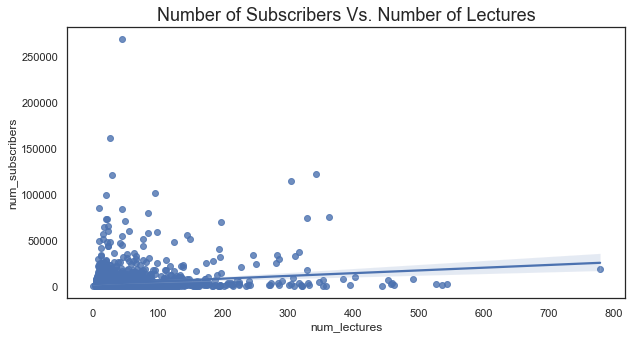

In [77]:
# Visualizing the Relation between them
#We can interpret from the visual and pearson correlation coefficient value of 0.15 
#There is almost no relationship between number of subscribers and number of lectures
plt.figure(figsize=(10,5));
sns.regplot(x='num_lectures',y='num_subscribers',data=udemy_courses_df,color='b');
plt.title('Number of Subscribers Vs. Number of Lectures',fontsize=18);

<Figure size 720x360 with 0 Axes>

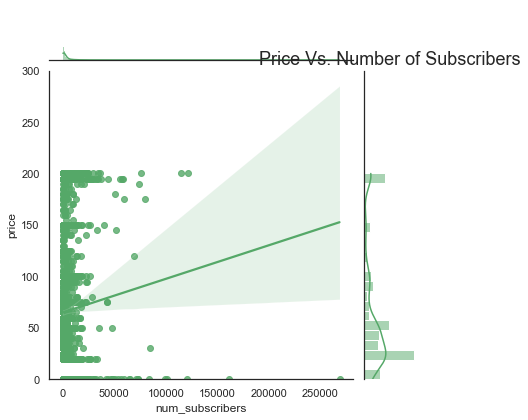

In [78]:
#Is there a relationship between the price of the course and the number of subscribers?
# the pearson correlation coefficient value of 0.051 that there is almost no relationship between increase in the price and increaseinn number of subscribers
plt.figure(figsize=(10,5));
sns.jointplot(x='num_subscribers',y='price',data=udemy_courses_df,color='g',kind='reg');
plt.ylim(0,300);
plt.title('Price Vs. Number of Subscribers',fontsize=18);
plt.xlabel('Number of subscribers',size=18);
plt.ylabel('Price',size=18);

In [79]:
#What is the kind of relationship between price and number of lectures
#calculating pearson correlation between variables

udemy_courses_df[['price','num_lectures']].corr()

price  num_lectures
price         1.00000       0.33016
num_lectures  0.33016       1.00000

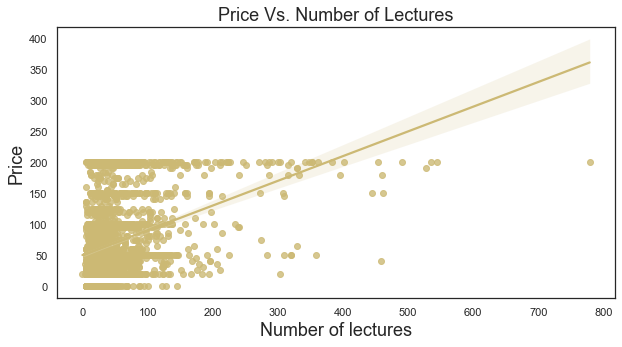

In [80]:
# Visualizing the Relation between price and number of lectures

#The visual and the pearson correlation of 0.33 shows that here is
#a moderate relationship between Price and number of lectures
#which means as the number of lectures increases the price slightly increases
plt.figure(figsize=(10,5));
sns.regplot(x='num_lectures',y='price',data=udemy_courses_df,color='y');
plt.title('Price Vs. Number of Lectures',fontsize=18);
plt.ylabel('Price',size=18);
plt.xlabel('Number of lectures',size=18);

In [81]:

    #There is a positive, not strong relation between number of reviews and number of subscribers.
    #There is no  relation between price and number of subscribers.
    #There is almost a strong, positive relation between number of lectures and content duration.


In [82]:
#Top 10 Organizations/University  enrolled students wise in coursera

enroll = udemy_courses_df.loc[:, ['course_title','num_subscribers']]
enroll = pd.DataFrame(enroll.groupby(['course_title'])['num_subscribers'].sum())
enroll = enroll.sort_values(by=['num_subscribers'], ascending=False)
enroll1 = enroll.head(10)
print('Course Enrolled Students')
print(enroll1)


Course Enrolled Students
                                                    num_subscribers
course_title                                                       
Learn HTML5 Programming From Scratch                         268923
Coding for Entrepreneurs Basic                               161029
The Web Developer Bootcamp                                   121584
Build Your First Website in 1 Week with HTML5 a...           120291
The Complete Web Developer Course 2.0                        114512
Free Beginner Electric Guitar Lessons                        101154
Web Design for Web Developers: Build Beautiful ...            98867
Learn Web Designing & HTML5/CSS3 Essentials in ...            86570
Learn Javascript & JQuery From Scratch                        84897
Practical PHP: Master the Basics and Code Dynam...            83737


In [83]:
print(enroll1)

                                                    num_subscribers
course_title                                                       
Learn HTML5 Programming From Scratch                         268923
Coding for Entrepreneurs Basic                               161029
The Web Developer Bootcamp                                   121584
Build Your First Website in 1 Week with HTML5 a...           120291
The Complete Web Developer Course 2.0                        114512
Free Beginner Electric Guitar Lessons                        101154
Web Design for Web Developers: Build Beautiful ...            98867
Learn Web Designing & HTML5/CSS3 Essentials in ...            86570
Learn Javascript & JQuery From Scratch                        84897
Practical PHP: Master the Basics and Code Dynam...            83737


In [84]:
dfnew = udemy_courses_df.groupby(['course_title'],as_index=False)[['num_reviews' ,'num_subscribers']].sum()
dfnew

course_title  num_reviews  \
0     #1 Piano Hand Coordination: Play 10th Ballad i...           18   
1     #10 Hand Coordination - Transfer Chord Ballad ...            1   
2     #12 Hand Coordination: Let your Hands dance wi...            1   
3     #4 Piano Hand Coordination: Fun Piano Runs in ...            3   
4     #5  Piano Hand Coordination:  Piano Runs in 2 ...            3   
...                                                 ...          ...   
3658                                        财务分析与估值建模入门           43   
3659               超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜            1   
3660                             캔바(Canva)로 SNS 콘텐츠 만들기           13   
3661                      ６時間でインターバンク市場を攻略！最短距離でトレード基礎力           40   
3662         ７日でマスター  ビギナー向け Adobe Illustrator　どきどきセミナー            3   

      num_subscribers  
0                3137  
1                1593  
2                 482  
3                 850  
4                 940  
...               ...  
3658              505  
3659                8  
3660               44  
3661              280  
3662              108  

[3663 rows x 3 columns]

In [85]:
dfnew = dfnew.sort_values(by=['num_subscribers'], ascending=False)
dfnew=dfnew.nlargest(10,'num_subscribers')
#df_new1=df_new.head(10)
dfnew

course_title  num_reviews  \
2108               Learn HTML5 Programming From Scratch         8629   
757                      Coding for Entrepreneurs Basic          279   
3296                         The Web Developer Bootcamp        27445   
592   Build Your First Website in 1 Week with HTML5 ...         5924   
3227              The Complete Web Developer Course 2.0        22412   
1337              Free Beginner Electric Guitar Lessons         1042   
3463  Web Design for Web Developers: Build Beautiful...         6512   
2244  Learn Web Designing & HTML5/CSS3 Essentials in...         1050   
2143             Learn Javascript & JQuery From Scratch         2685   
2800  Practical PHP: Master the Basics and Code Dyna...         4598   

      num_subscribers  
2108           268923  
757            161029  
3296           121584  
592            120291  
3227           114512  
1337           101154  
3463            98867  
2244            86570  
2143            84897  
2800            83737

<function matplotlib.pyplot.show(close=None, block=None)>

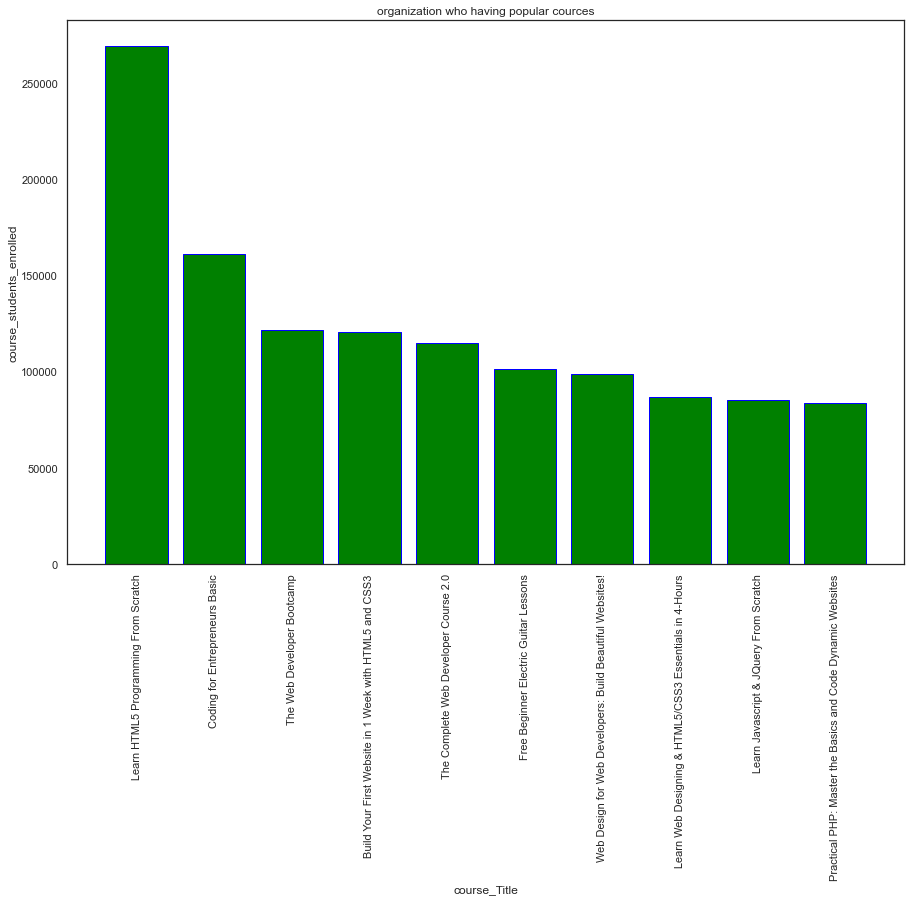

In [86]:
fig = plt.figure(figsize =(15,10))
plt.xticks(rotation='vertical')
plt.bar(dfnew['course_title'],dfnew['num_subscribers'],color="green", edgecolor='blue')
plt.title('organization who having popular cources')
plt.xlabel('course_Title')
plt.ylabel('course_students_enrolled')
plt.show

<AxesSubplot:xlabel='price', ylabel='level'>

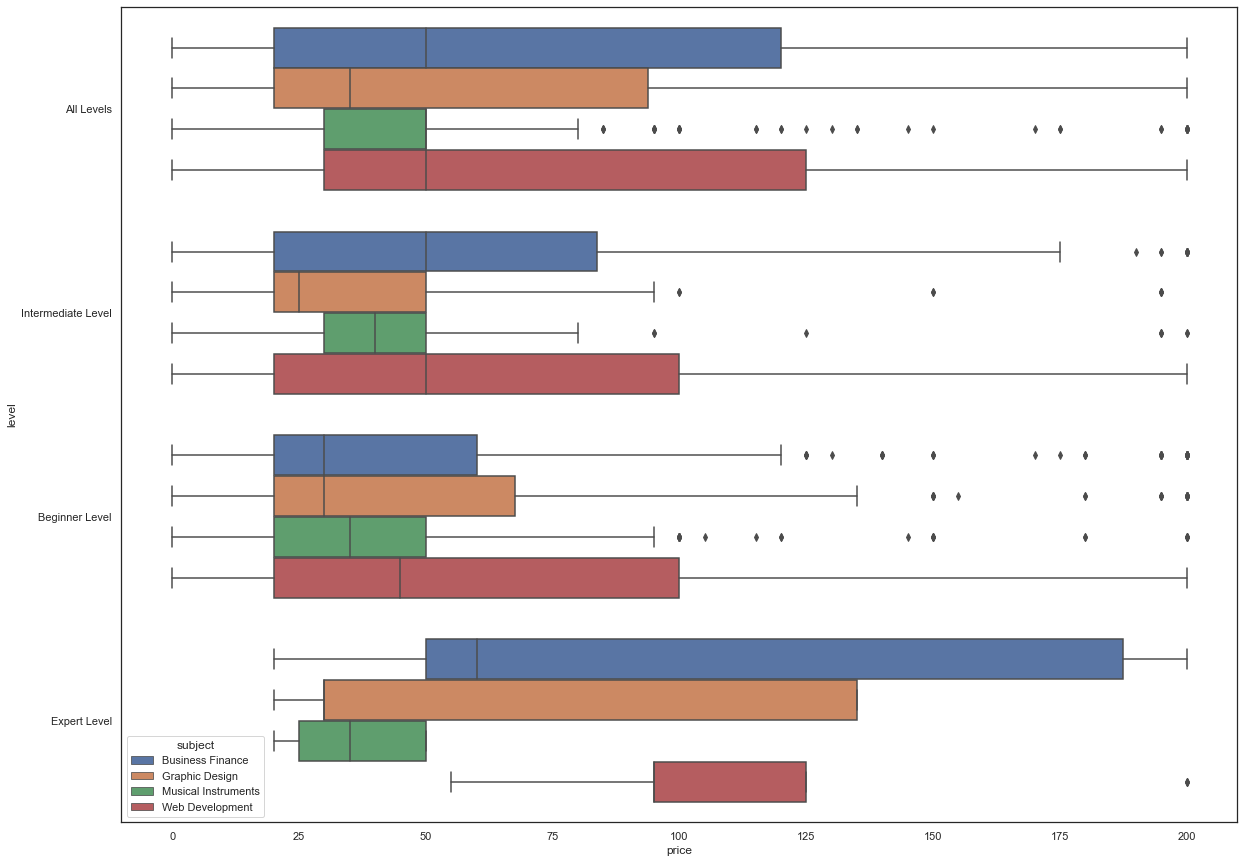

In [87]:
plt.figure(figsize=(20,15))
sns.boxplot(x="price", y="level", hue='subject', data=udemy_courses_df)

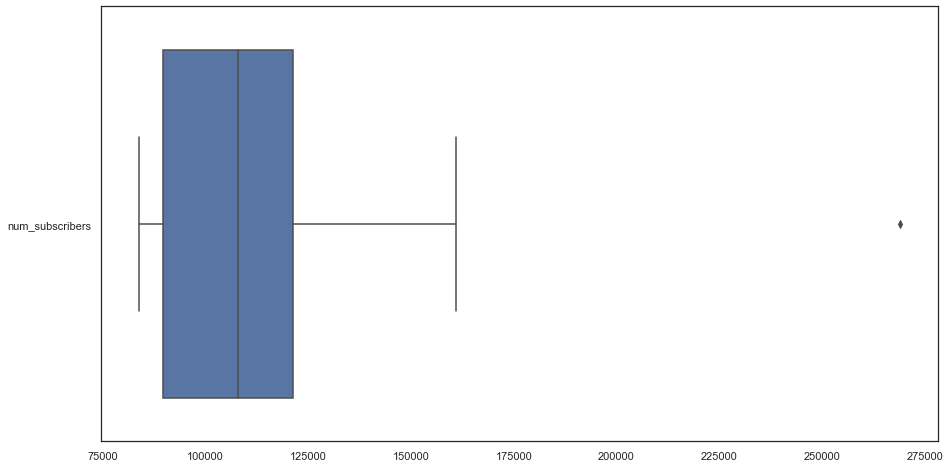

In [88]:
fig = plt.figure(figsize = (15,8))
ax = sns.boxplot(data = enroll1.iloc[:, 0:2], orient = 'h')

# RQ6. Can we find common paths through courses that students take?

<AxesSubplot:xlabel='subject', ylabel='num_subscribers'>

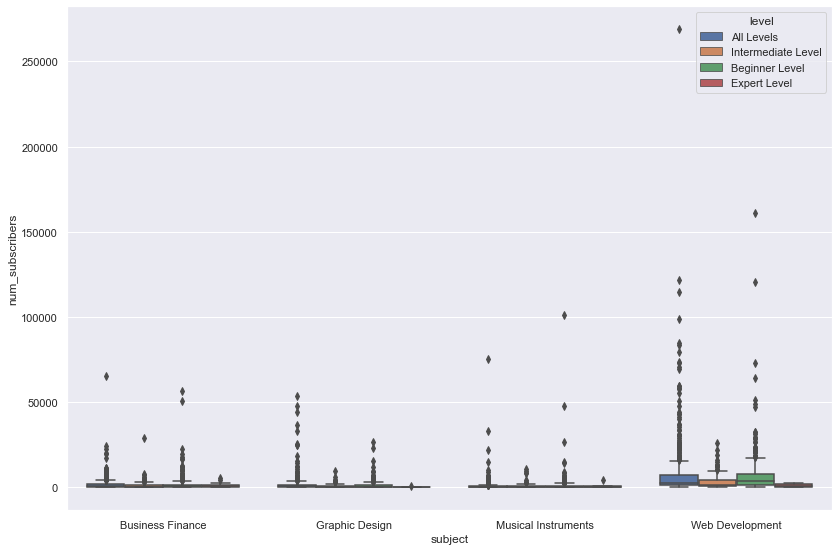

In [89]:

sns.set(rc={'figure.figsize':(13.7,9.27)})
sns.boxplot(x="subject", y="num_subscribers", hue='level', data= udemy_courses_df)

Text(40.63208055555556, 0.5, 'Number of Subscriber')

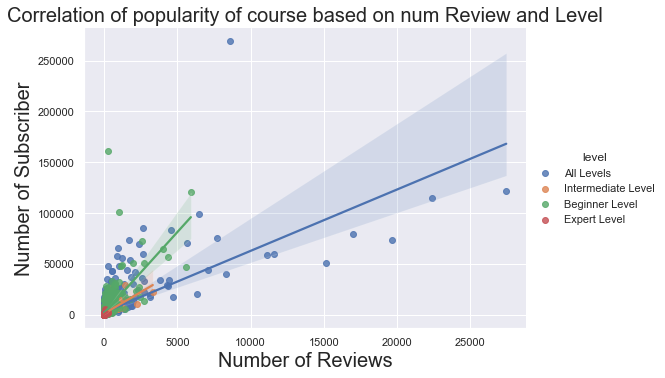

In [90]:

sns.lmplot(x="num_reviews", y="num_subscribers", hue ="level", 
           data=udemy_courses_df.loc[udemy_courses_df["level"].isin(['Beginner Level','Intermediate Level','Expert Level','All Levels'])], 
           fit_reg=True, height=5, aspect=1.5)
plt.title("Correlation of popularity of course based on num Review and Level", fontsize =20)
plt.xlabel("Number of Reviews", fontsize=20)
plt.ylabel("Number of Subscriber", fontsize=20)

Text(41.59804583333333, 0.5, 'Number of Subscriber')

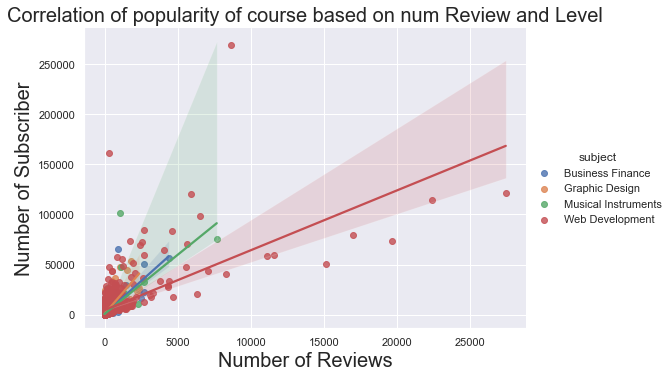

In [91]:
sns.lmplot(x="num_reviews", y="num_subscribers", hue ="subject", 
           data=udemy_courses_df.loc[udemy_courses_df["subject"].isin(['Business Finance','Web Development','Graphic Design','Musical Instruments'])], 
           fit_reg=True, height=5, aspect=1.5)
plt.title("Correlation of popularity of course based on num Review and Level", fontsize =20)
plt.xlabel("Number of Reviews", fontsize=20)
plt.ylabel("Number of Subscriber", fontsize=20)

>- Most of the students enrol themselves in web developement in Udemy. That can be considered as common path for the studnets to follow.

# Most Frequent Words in Courses Title

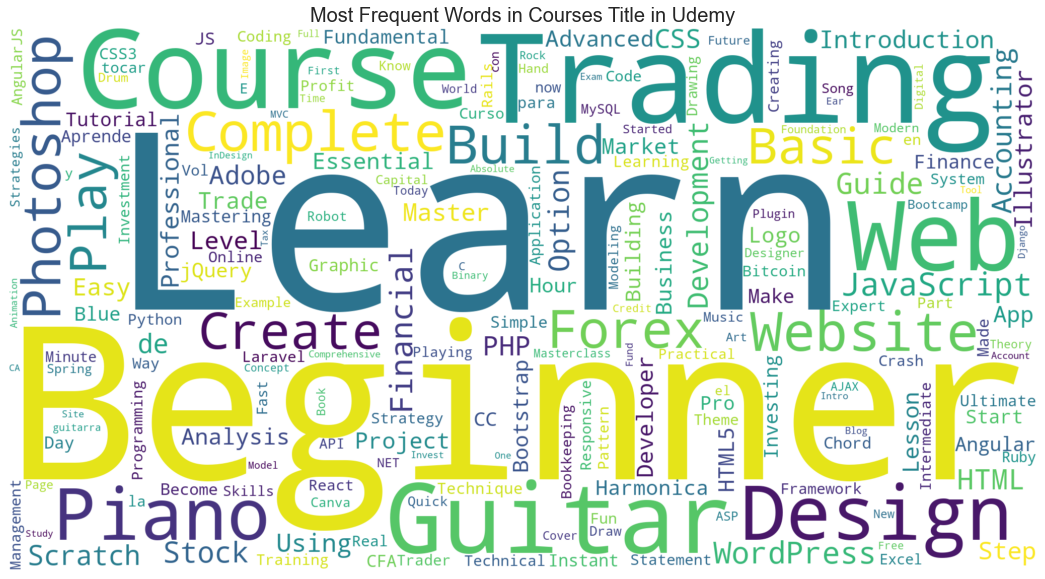

In [92]:
# creating the text variable
text1 = " ".join(course_title for course_title in udemy_courses_df.course_title	)
# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text1)
# saving the image
word_cloud1.to_file('abc.png')
# Display the generated Word Cloud
plt.figure(figsize=(20,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.title("Most Frequent Words in Courses Title in Udemy", fontsize =20)
plt.axis("off")
plt.show()

In [93]:
# Extract/check the lecture containing the word 'Data' in the Frame
dfg=udemy_courses_df[udemy_courses_df['course_title'].str.contains('Guitar')]
dfg = pd.DataFrame(dfg.sort_values(by = 'num_subscribers' , ascending = False))[['course_title','num_subscribers']].head(10)
dfg

course_title  num_subscribers
1896          Free Beginner Electric Guitar Lessons           101154
2004            Getting Started with Playing Guitar            47652
1982  Complete Guitar System - Beginner to Advanced            32935
2043                        Learn Guitar in 21 Days            26504
1980            The Professional Guitar Masterclass            21701
2025      Best Beginner Guitar Lessons by Sam Lyons            14560
1901                         Acoustic Guitar Basics            14495
1983                    Guitar Super System Level 1            10869
1950             Jazz Guitar Tips, Tricks and Licks             9351
1893             The Total Beginner's Guitar Course             9193

<function matplotlib.pyplot.show(close=None, block=None)>

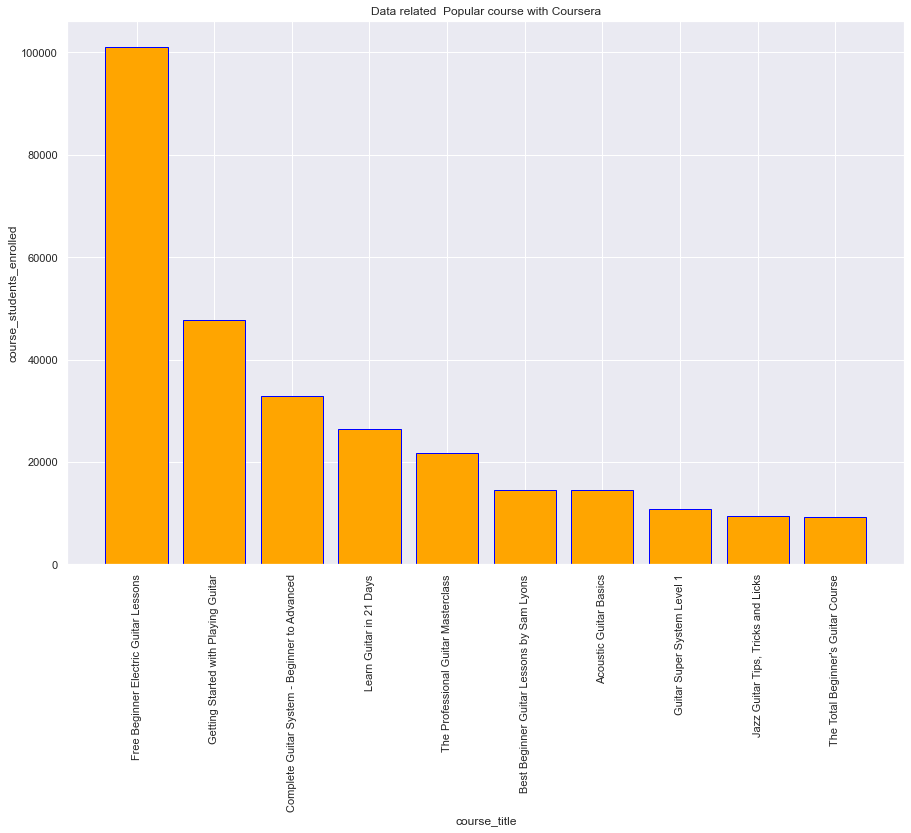

In [94]:
fig = plt.figure(figsize =(15,10))
plt.xticks(rotation='vertical')
plt.bar(dfg['course_title'],dfg['num_subscribers'],color="orange", edgecolor='blue')
plt.title('Data related  Popular course with Coursera')
plt.xlabel('course_title')
plt.ylabel('course_students_enrolled')
plt.show

In [95]:
# Extract/check the lecture containing the word 'Data' in the Frame
dfw=udemy_courses_df[udemy_courses_df['course_title'].str.contains('Website ')]
dfw = pd.DataFrame(dfw.sort_values(by = 'num_subscribers' , ascending = False))[['course_title','num_subscribers']].head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

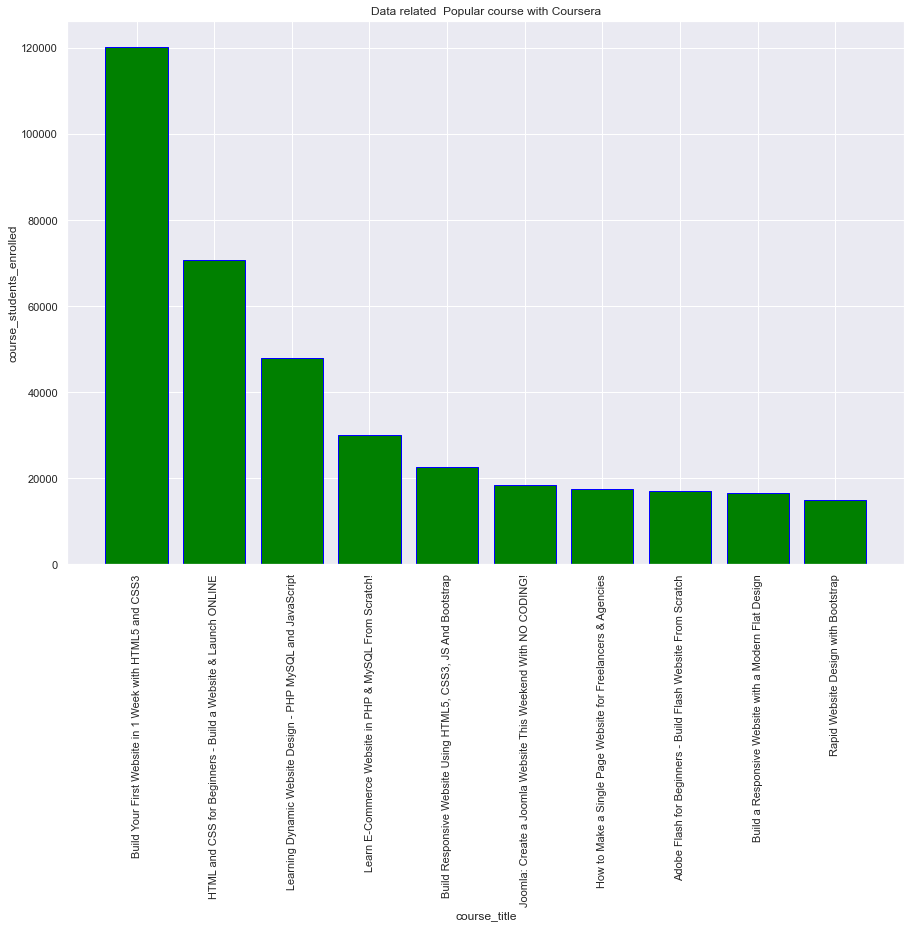

In [96]:
fig = plt.figure(figsize =(15,10))
plt.xticks(rotation='vertical')
plt.bar(dfw['course_title'],dfw['num_subscribers'], color="green",edgecolor='blue')
plt.title('Data related  Popular course with Coursera')
plt.xlabel('course_title')
plt.ylabel('course_students_enrolled')
plt.show

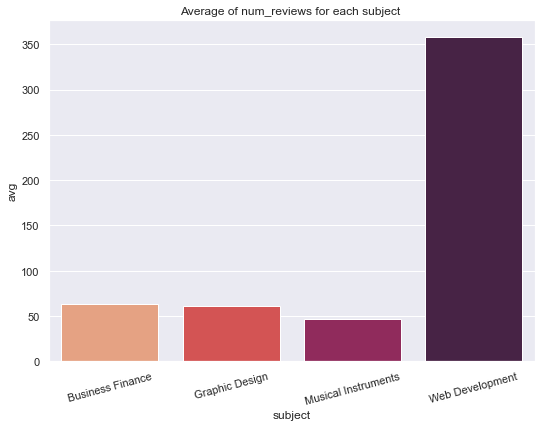

In [97]:
palette = ['rocket_r','viridis','magma','crest']
def my_plot():
    cat_data = ['subject' , 'level']
    num_data = ['num_reviews','num_subscribers']
    pal_index = 0
    for i in num_data:
        for j in cat_data:
            avg =udemy_courses_df.groupby(j)[i].mean().reset_index(name = 'avg')
            sns.set(rc={'figure.figsize':(8.7,6.27)})
            sns.barplot(data = avg , x = j , y = 'avg' , palette = palette[pal_index])
            plt.xticks(rotation = 15)
            plt.title("Average of {} for each {} ".format(i,j));
            pal_index +=1
            yield
            
myplot = my_plot()
next(myplot)

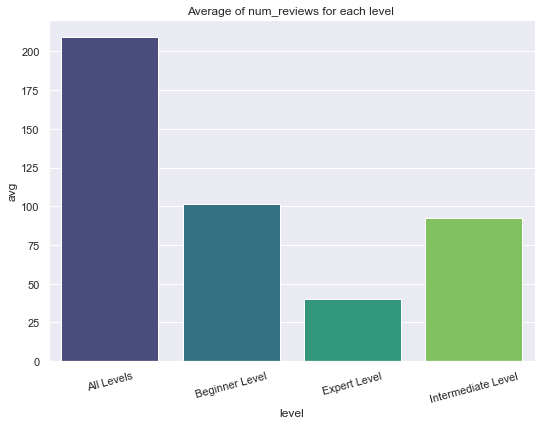

In [98]:
next(myplot)

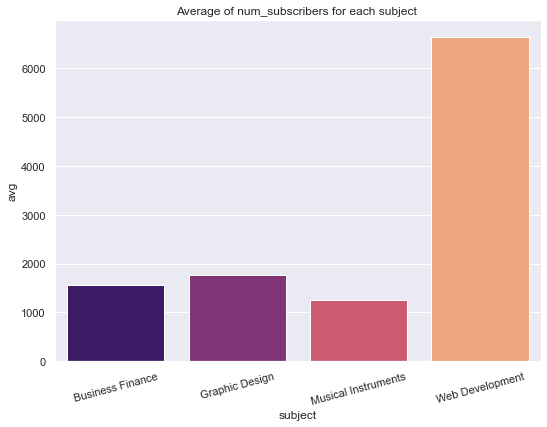

In [99]:
next(myplot)

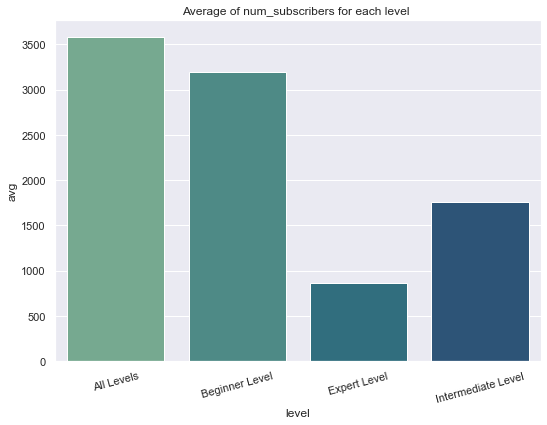

In [100]:
next(myplot)